In [2]:
# Tabla de eventos extremos para análisis en GEE/Colab
# Cada evento tiene un área aproximada definida por 3-5 puntos, fechas en formato GEE,
# variables principales con ponderación lógica, y descripción del fenómeno.

events_area = [
    {
        "name": "Sequía extrema",
        "region": "California, EE. UU.",
        "coords": [  # área aproximada (polígono)
            [36.8, -120.0],
            [36.8, -119.0],
            [35.9, -119.0],
            [35.9, -120.0]
        ],
        "start_date": "2014-01-01",
        "end_date": "2017-12-31",
        "variables": {  # ponderación de impacto en el índice de estrés
            "NDVI": 0.5,
            "precipitation": 0.4,
            "evapotranspiration": 0.1
        },
        "description": "Sequía prolongada afectando agricultura y provocando incendios forestales."
    },
    {
        "name": "Calor extremo",
        "region": "Australia (Sur y Este)",
        "coords": [
            [-34.0, 150.5],
            [-34.0, 152.0],
            [-32.5, 152.0],
            [-32.5, 150.5]
        ],
        "start_date": "2019-01-01",
        "end_date": "2020-12-31",
        "variables": {
            "T2M": 0.7,       # temperatura diurna principal
            "NDVI": 0.2,      # afectación indirecta a vegetación
            "ET": 0.1         # pérdida de agua
        },
        "description": "Ola de calor récord afectando estrés en cultivos."
    },
    {
        "name": "Plagas agrícolas",
        "region": "India (Punjab)",
        "coords": [
            [30.5, 75.5],
            [30.5, 76.2],
            [31.3, 76.2],
            [31.3, 75.5]
        ],
        "start_date": "2020-06-01",
        "end_date": "2020-09-30",
        "variables": {
            "NDVI": 0.6,      # vegetación afectada
            "T2M": 0.3        # temperatura favorece plagas
        },
        "description": "Brotes de langostas del desierto afectando trigo y otros cultivos."
    },
    {
        "name": "Precipitaciones fluviales",
        "region": "Bangladesh (Delta del Ganges)",
        "coords": [
            [23.5, 90.0],
            [23.5, 91.2],
            [24.2, 91.2],
            [24.2, 90.0]
        ],
        "start_date": "2017-07-01",
        "end_date": "2017-09-30",
        "variables": {
            "precipitation": 0.7,
            "soil_moisture": 0.3
        },
        "description": "Inundaciones por lluvias monzónicas afectando arrozales."
    },
    {
        "name": "Heladas / Frío extremo",
        "region": "Rusia (Siberia)",
        "coords": [
            [61.0, 104.0],
            [61.0, 107.0],
            [62.5, 107.0],
            [62.5, 104.0]
        ],
        "start_date": "2018-01-01",
        "end_date": "2018-03-31",
        "variables": {
            "Tmin": 0.6,   # temperatura mínima afecta directamente
            "NDVI": 0.4    # vegetación afectada
        },
        "description": "Heladas severas afectando cultivos de cereales y hortalizas."
    },
    {
        "name": "Fenómeno de El Niño / Lluvias intensas",
        "region": "Perú (Costa norte y central: Piura, Lambayeque, La Libertad, Lima, Ica)",
        "coords": [
            [-5.2, -81.0],
            [-5.2, -80.3],
            [-12.2, -77.0],
            [-12.2, -76.5]
        ],
        "start_date": "2017-01-01",
        "end_date": "2017-04-30",
        "variables": {
            "precipitation": 0.6,
            "NDVI": 0.3,
            "soil_moisture": 0.1
        },
        "description": "Lluvias extremas, inundaciones y desbordes de ríos afectando cultivos y suelos."
    }
]

# ✅ Nota:
# - coords → polígono aproximado, no demasiados puntos para simplificar extracción en GEE.
# - variables → ponderación de impacto, suman 1.0, coherente con la relevancia de cada variable para el evento.
# - fechas → formato GEE "YYYY-MM-DD".


In [3]:
import pandas as pd

# Convertir lista de eventos a DataFrame
data = []
for event in events_area:
    data.append({
        "Nombre": event["name"],
        "Región": event["region"],
        "Fecha Inicio": event["start_date"],
        "Fecha Fin": event["end_date"],
        "Variables (ponderación)": ", ".join([f"{k}: {v}" for k,v in event["variables"].items()]),
        "Descripción": event["description"]
    })

df = pd.DataFrame(data)
df


,Nombre,Región,Fecha Inicio,Fecha Fin,Variables (ponderación),Descripción
0,Sequía extrema,"California, EE. UU.",2014-01-01,2017-12-31,"NDVI: 0.5, precipitation: 0.4, evapotranspirat...",Sequía prolongada afectando agricultura y prov...
1,Calor extremo,Australia (Sur y Este),2019-01-01,2020-12-31,"T2M: 0.7, NDVI: 0.2, ET: 0.1",Ola de calor récord afectando estrés en cultivos.
2,Plagas agrícolas,India (Punjab),2020-06-01,2020-09-30,"NDVI: 0.6, T2M: 0.3",Brotes de langostas del desierto afectando tri...
3,Precipitaciones fluviales,Bangladesh (Delta del Ganges),2017-07-01,2017-09-30,"precipitation: 0.7, soil_moisture: 0.3",Inundaciones por lluvias monzónicas afectando ...
4,Heladas / Frío extremo,Rusia (Siberia),2018-01-01,2018-03-31,"Tmin: 0.6, NDVI: 0.4",Heladas severas afectando cultivos de cereales...
5,Fenómeno de El Niño / Lluvias intensas,"Perú (Costa norte y central: Piura, Lambayeque...",2017-01-01,2017-04-30,"precipitation: 0.6, NDVI: 0.3, soil_moisture: 0.1","Lluvias extremas, inundaciones y desbordes de ..."


In [4]:
import folium

# Crear un mapa base centrado en el mundo
m = folium.Map(location=[0, 0], zoom_start=2)

# Añadir polígonos para cada evento
for event in events_area:
    folium.Polygon(
        locations=event["coords"],
        color="blue",
        fill=True,
        fill_opacity=0.3,
        popup=f"{event['name']} ({event['region']})"
    ).add_to(m)

# Mostrar mapa
m


# Refinado del dataset VariedadesPapas

In [ ]:
# Celda 1: Clonar el repositorio y preparar el dataset
!git clone https://github.com/chikiyu/cnn-clasificacion-papas.git

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

dataset_path = '/content/cnn-clasificacion-papas/dataset/dataset128x128'

# Verificar clases
clases = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
print(f"Clases encontradas ({len(clases)}): {clases}")


fatal: destination path 'cnn-clasificacion-papas' already exists and is not an empty directory.
Clases encontradas (83): ['V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V3', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V5', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V6', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V7', 'V70', 'V71', 'V72', 'V73', 'V75', 'V76', 'V77', 'V78', 'V79', 'V8', 'V80', 'V81', 'V82', 'V83', 'V84', 'V9']


## Data aumentation

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
import shutil

# Directorio para dataset aumentado
augmented_dir = '/content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado'
if os.path.exists(augmented_dir):
    shutil.rmtree(augmented_dir)
os.makedirs(augmented_dir)

img_size = (128, 128)
target_num_images_per_class = 300

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.20,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='reflect'
)

def adjust_contrast(img_array, lower=0.8, upper=1.2):
    factor = np.random.uniform(lower, upper)
    img_tensor = tf.convert_to_tensor(img_array)
    img_contrast = tf.image.adjust_contrast(img_tensor, factor)
    return img_contrast.numpy()

for clase in clases:
    src_dir = os.path.join(dataset_path, clase)
    dst_dir = os.path.join(augmented_dir, clase)
    os.makedirs(dst_dir, exist_ok=True)

    imagenes = os.listdir(src_dir)
    # Copiar originales
    for img_name in imagenes:
        shutil.copy(os.path.join(src_dir, img_name), os.path.join(dst_dir, img_name))

    num_original = len(imagenes)
    num_to_generate = target_num_images_per_class - num_original
    i = 0
    while i < num_to_generate:
        img_path = os.path.join(src_dir, np.random.choice(imagenes))
        img = load_img(img_path, target_size=img_size)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        for batch in datagen.flow(x, batch_size=1):
            img_aug = batch[0].astype(np.uint8)
            img_aug = adjust_contrast(img_aug, 0.8, 1.2)
            img_aug = np.clip(img_aug, 0, 255).astype(np.uint8)
            save_path = os.path.join(dst_dir, f"aug_{i}.png")
            save_img(save_path, img_aug)
            i += 1
            break
    print(f"{clase}: {num_original} originales, {num_to_generate} aumentadas.")


V1: 50 originales, 250 aumentadas.
V10: 76 originales, 224 aumentadas.
V11: 50 originales, 250 aumentadas.
V12: 75 originales, 225 aumentadas.
V13: 75 originales, 225 aumentadas.
V14: 141 originales, 159 aumentadas.
V15: 166 originales, 134 aumentadas.
V16: 63 originales, 237 aumentadas.
V17: 50 originales, 250 aumentadas.
V18: 50 originales, 250 aumentadas.
V19: 50 originales, 250 aumentadas.
V2: 57 originales, 243 aumentadas.
V20: 50 originales, 250 aumentadas.
V21: 51 originales, 249 aumentadas.
V22: 50 originales, 250 aumentadas.
V23: 50 originales, 250 aumentadas.
V24: 50 originales, 250 aumentadas.
V25: 50 originales, 250 aumentadas.
V26: 50 originales, 250 aumentadas.
V27: 67 originales, 233 aumentadas.
V28: 75 originales, 225 aumentadas.
V29: 55 originales, 245 aumentadas.
V3: 56 originales, 244 aumentadas.
V30: 51 originales, 249 aumentadas.
V31: 52 originales, 248 aumentadas.
V32: 50 originales, 250 aumentadas.
V33: 50 originales, 250 aumentadas.
V34: 50 originales, 250 aumen

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    augmented_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    augmented_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

print(f"Total imágenes entrenamiento: {train_data.samples}")
print(f"Total imágenes validación: {val_data.samples}")
print(f"Clases: {train_data.class_indices}")
print(tf.test.gpu_device_name() or "GPU no disponible")


Found 19920 images belonging to 83 classes.
Found 4980 images belonging to 83 classes.
Total imágenes entrenamiento: 19920
Total imágenes validación: 4980
Clases: {'V1': 0, 'V10': 1, 'V11': 2, 'V12': 3, 'V13': 4, 'V14': 5, 'V15': 6, 'V16': 7, 'V17': 8, 'V18': 9, 'V19': 10, 'V2': 11, 'V20': 12, 'V21': 13, 'V22': 14, 'V23': 15, 'V24': 16, 'V25': 17, 'V26': 18, 'V27': 19, 'V28': 20, 'V29': 21, 'V3': 22, 'V30': 23, 'V31': 24, 'V32': 25, 'V33': 26, 'V34': 27, 'V35': 28, 'V36': 29, 'V37': 30, 'V38': 31, 'V39': 32, 'V4': 33, 'V40': 34, 'V41': 35, 'V42': 36, 'V43': 37, 'V44': 38, 'V45': 39, 'V46': 40, 'V47': 41, 'V48': 42, 'V49': 43, 'V5': 44, 'V50': 45, 'V51': 46, 'V52': 47, 'V53': 48, 'V54': 49, 'V55': 50, 'V56': 51, 'V57': 52, 'V58': 53, 'V59': 54, 'V6': 55, 'V60': 56, 'V61': 57, 'V62': 58, 'V63': 59, 'V64': 60, 'V65': 61, 'V66': 62, 'V67': 63, 'V68': 64, 'V69': 65, 'V7': 66, 'V70': 67, 'V71': 68, 'V72': 69, 'V73': 70, 'V75': 71, 'V76': 72, 'V77': 73, 'V78': 74, 'V79': 75, 'V8': 76, 'V80': 

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_classes = train_data.num_classes

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('mejor_modelo_vgg16_aumentado.h5', save_best_only=True)
]

history = model.fit(
    train_data,
    epochs=40,
    validation_data=val_data,
    callbacks=callbacks
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 83)             │        42,579 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,954,131 (72.30 MB)

 Trainable params: 4,238,419 (16.17 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2516 - loss: 3.0524

623/623 ━━━━━━━━━━━━━━━━━━━━ 62s 85ms/step - accuracy: 0.2518 - loss: 3.0514 - val_accuracy: 0.6169 - val_loss: 1.3098
Epoch 2/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5882 - loss: 1.4580

623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.5882 - loss: 1.4579 - val_accuracy: 0.6849 - val_loss: 1.0715
Epoch 3/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6849 - loss: 1.0776

623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6849 - loss: 1.0776 - val_accuracy: 0.7052 - val_loss: 0.9580
Epoch 4/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7343 - loss: 0.8999

623/623 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.7343 - loss: 0.8999 - val_accuracy: 0.7488 - val_loss: 0.8137
Epoch 5/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7760 - loss: 0.7561

623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7760 - loss: 0.7561 - val_accuracy: 0.7490 - val_loss: 0.7760
Epoch 6/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8017 - loss: 0.6683

623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8017 - loss: 0.6684 - val_accuracy: 0.7604 - val_loss: 0.7600
Epoch 7/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8122 - loss: 0.6249

623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8122 - loss: 0.6249 - val_accuracy: 0.7604 - val_loss: 0.7504
Epoch 8/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8315 - loss: 0.5561

623/623 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.8315 - loss: 0.5561 - val_accuracy: 0.7914 - val_loss: 0.6421
Epoch 9/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.8363 - loss: 0.5229 - val_accuracy: 0.7986 - val_loss: 0.6435
Epoch 10/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8517 - loss: 0.4788

623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8517 - loss: 0.4788 - val_accuracy: 0.8020 - val_loss: 0.6152
Epoch 11/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.8617 - loss: 0.4503 - val_accuracy: 0.7765 - val_loss: 0.7290
Epoch 12/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8714 - loss: 0.4200 - val_accuracy: 0.8042 - val_loss: 0.6219
Epoch 13/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8739 - loss: 0.4067 - val_accuracy: 0.7777 - val_loss: 0.7111
Epoch 14/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8820 - loss: 0.3771

623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8819 - loss: 0.3771 - val_accuracy: 0.8155 - val_loss: 0.5776
Epoch 15/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8877 - loss: 0.3561 - val_accuracy: 0.8114 - val_loss: 0.5912
Epoch 16/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8837 - loss: 0.3581 - val_accuracy: 0.7845 - val_loss: 0.6802
Epoch 17/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9003 - loss: 0.3185

623/623 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9003 - loss: 0.3186 - val_accuracy: 0.8245 - val_loss: 0.5521
Epoch 18/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.8987 - loss: 0.3151 - val_accuracy: 0.8050 - val_loss: 0.6398
Epoch 19/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9024 - loss: 0.3049 - val_accuracy: 0.8006 - val_loss: 0.6449
Epoch 20/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9077 - loss: 0.2890 - val_accuracy: 0.8259 - val_loss: 0.5608
Epoch 21/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - accuracy: 0.9053 - loss: 0.2925 - val_accuracy: 0.8207 - val_loss: 0.5830
Epoch 22/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9100 - loss: 0.2702 - val_accuracy: 0.8030 - val_loss: 0.6379
Epoch 23/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9103 - loss: 0.2738 - val_accuracy: 0.8102 - val_loss: 0.6017
Epoch 24/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9147 - loss: 0.2640

623/623 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9147 - loss: 0.2640 - val_accuracy: 0.8295 - val_loss: 0.5350
Epoch 25/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9159 - loss: 0.2551 - val_accuracy: 0.6813 - val_loss: 1.3428
Epoch 26/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9164 - loss: 0.2527 - val_accuracy: 0.8135 - val_loss: 0.6313
Epoch 27/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9212 - loss: 0.2433 - val_accuracy: 0.8080 - val_loss: 0.6789
Epoch 28/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.9175 - loss: 0.2514 - val_accuracy: 0.8032 - val_loss: 0.6913
Epoch 29/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9211 - loss: 0.2386 - val_accuracy: 0.8267 - val_loss: 0.5888
Epoch 30/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9254 - loss: 0.2328 - val_accuracy: 0.8114 - val_loss: 0.6219
Epoch 31/40
623/623 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9243 - loss: 0.2302 - val_

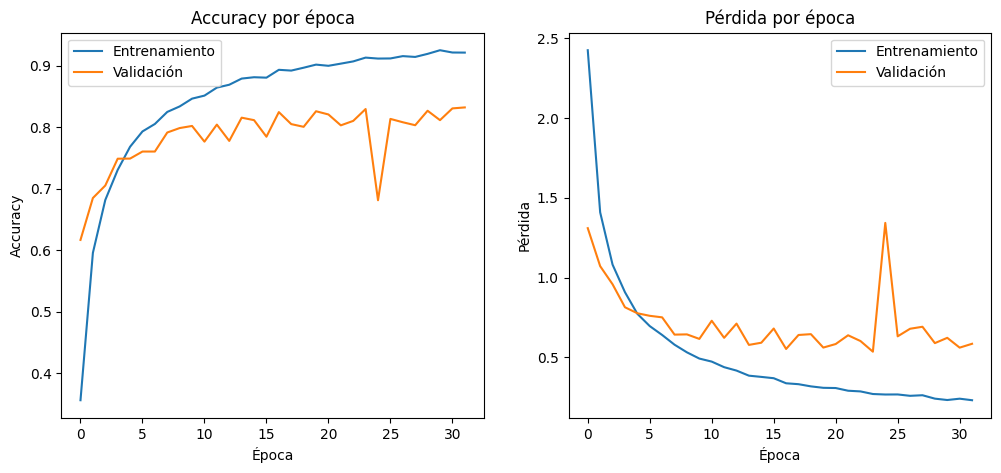

156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step


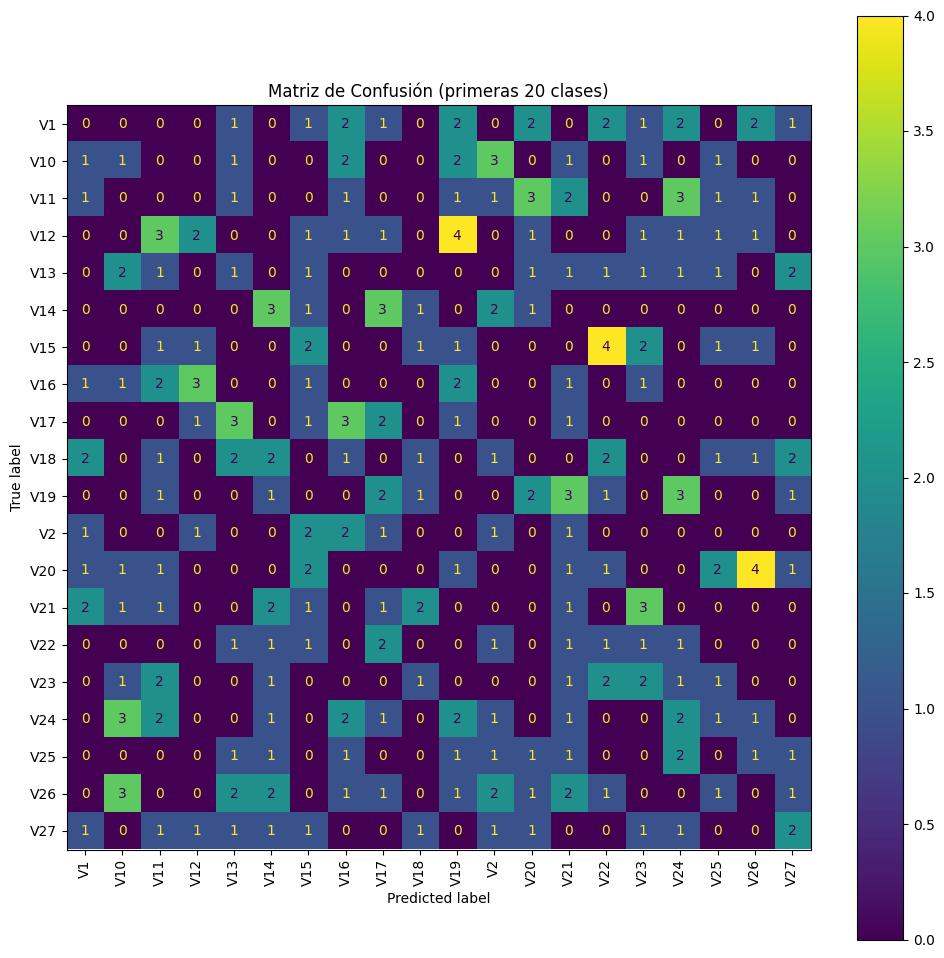

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Curvas de accuracy y pérdida
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy por época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Matriz de confusión (primeras 20 clases para visualizar)
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
labels = list(train_data.class_indices.keys())
labels_mini = labels[:20]

fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm[:20, :20], display_labels=labels_mini)
disp.plot(ax=ax, xticks_rotation=90)
plt.title('Matriz de Confusión (primeras 20 clases)')
plt.show()


In [ ]:
# 1. Comprimir la carpeta en un archivo ZIP
!zip -r /content/dataset_aumentado.zip /content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado
# 2. Descargar el archivo ZIP a tu computadora
from google.colab import files
files.download('/content/dataset_aumentado.zip')


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/aug_121.png (deflated 0%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/32.jpg (deflated 3%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/aug_141.png (deflated 1%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/aug_162.png (stored 0%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/48.jpg (deflated 3%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/aug_79.png (deflated 1%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/49.jpg (deflated 3%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/aug_132.png (deflated 1%)
  adding: content/cnn-clasificacion-papas/dataset/dataset128x128_aumentado/V52/aug_46.png (deflated 1%)
  addin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>